# Bin Packing Lab

- Authors:
  - Quinn Ha, hab8@mcmaster.ca
  - Fondson Lu, luh57@mcmaster.ca
- Group ID on Avenue: 58
- Gitlab URL: https://gitlab.cas.mcmaster.ca/hab8/l2-bin-packing

## T1

### Solid Principles
S - The implementation of teh entire system is segregated - each class has a single responsability, whether it be an algorithm implementation, a dataset reader, etc.

O - For both the Datareader and Online/Offline classes, it is possible to extend off existing code by creating classes which inherit from the base abstract class with no modification needed (Open/Close)

L - For both the Datareader and Online/Offline class implementation, every subclass (implementations) are substitutable for their respectable parent classes. This is visible from the abstract methods present in the parent classes, and the same methods present in each child of the parent class!

I - Each algorithm only depends on methods that it needs, i.e online algorithm implementations only need to utilize the Online class, and doesn't depend on any other classes to perform its function.

D - Both Datareader and Online/Offline classes depend on abstract classes rather than concrete classes. Low level modules (dataset and algorithm implementation) only depend on the high level implementation (abstract classes), not the other way around.

### Evaluation of Different Dimensions
After carefully examining the provided dataset in the initial repository and reading the source document provided in the binpp files, I have noticed that there are key dimensions required for evaluating algorithms. These parameters include the number of items(n), the weight of items(wj), the bin capacity(c), and the minimal number of bins(m*).

Let’s breakdown the different data structures and related dimensions provided and make comparisons to understand the tradeoffs between them. By analyzing the binpp file, they have a specific file naming convention that indicate the different dimensions contained within the file. For example, NxCyWz where x=1,2,3,4 for n=50,100,200,500 respectively, where y=1,2,3 for c=100,120,150 respectively, and where z=1,2,4 for wj=[1,100],[20,100],[30,100] respectively. This data structure stores each dimensional information within one file. Another data structure is provided in the jburkardt folder such that each file contains separate dimensional information. For example, p01_c contains the bin capacity for test1, p02_w contains the weights for test2, p02_s contains the optimal assignment of weights for test2, and etc.

The way the data is structured plays an important role in the implementation and run time of an algorithm. For example, if we were to implement based off the jburkardt structure, then it would require a lot of file opening and reading just to grab a small piece of information such as the capacity. This would further slower the speed of your algorithm and solution. If we were to implement based off the binpp data structure, then we wouldn’t need to open and read several files as it is all stored within one file, thus our run time may potentially be slightly faster compared to the other data structure. However, there is a tradeoff now because if all our information were to be stored within one file, then it is not enforcing the idea of encapsulation.


In [14]:
# imports
from macpacking.algorithms.offline import  NextFit, FirstFitDecreasing, BestFitDecreasing, WorstFitDecreasing
from macpacking.algorithms.online import NextFit, BestFit, WorstBinAlgo, FirstFit, WorstFit, RefinedFirstFit
from macpacking.reader import BinppReader, jburkardtReader
from macpacking.algorithms.fixedalgo import EasiestFit
from offline_bench import run_bench
from kpi_bench import compare_KPI, compare_baseline, compare_baseline_2
import binpacking
import pyperf
import time
import csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## T2

In [2]:
from pyperf import BenchmarkSuite
cases = [
    './_datasets/binpp/N1C1W1/N1C1W1_A.BPP.txt',
    './_datasets/binpp/N4C1W1/N4C1W1_A.BPP.txt',
    './_datasets/binpp/N2C1W1/N2C1W1_A.BPP.txt',
    './_datasets/binpp/N2C3W1/N2C3W1_A.BPP.txt',
    './_datasets/binpp/N3C3W1/N3C3W1_A.BPP.txt',
    './_datasets/binpp/N3C3W4/N3C3W4_A.BPP.txt',
    ]

offline_algorithms = [
        NextFit(), 
        FirstFitDecreasing(), 
        BestFitDecreasing(), 
        WorstFitDecreasing()
    ]

online_algorithms = [
        WorstBinAlgo(),
        NextFit(), 
        FirstFit(), 
        BestFit(), 
        WorstFit()
    ]

# Checking out benchmark runtime result
def process_bench(algo_type):

    b_suite = BenchmarkSuite.load(algo_type)
    names = b_suite.get_benchmark_names()
    test_cases = [[], [], [], [], [], []]

    for i, name in enumerate(names):
        test_cases[i%6].append(name)

    for case in test_cases:
        file = case[0].split(" ")[0]
        print(file + ":")
        for sub_case in case:
            print(sub_case.split(" ")[1] + ": " + str(b_suite.get_benchmark(sub_case).mean()) + " s")
        print()
process_bench("offline_bench.json")


N1C1W1_A.BPP.txt:
NextFit: 5.8432412923177075e-05 s
FirstFitDecreasing: 0.00051906287109375 s
BestFitDecreasing: 0.0004797513802083333 s
WorstFitDecreasing: 0.0005140266731770833 s

N4C1W1_A.BPP.txt:
NextFit: 0.0005422643098958334 s
FirstFitDecreasing: 0.05348230958333333 s
BestFitDecreasing: 0.04169425875 s
WorstFitDecreasing: 0.0424004275 s

N2C1W1_A.BPP.txt:
NextFit: 0.00010549365397135418 s
FirstFitDecreasing: 0.0036390429427083336 s
BestFitDecreasing: 0.002062137291666667 s
WorstFitDecreasing: 0.0017737992447916667 s

N2C3W1_A.BPP.txt:
NextFit: 0.00013703295166015624 s
FirstFitDecreasing: 0.0020795861458333333 s
BestFitDecreasing: 0.001560248984375 s
WorstFitDecreasing: 0.0014710967838541668 s

N3C3W1_A.BPP.txt:
NextFit: 0.0002183002734375 s
FirstFitDecreasing: 0.005675667760416667 s
BestFitDecreasing: 0.005325432083333333 s
WorstFitDecreasing: 0.004840383333333333 s

N3C3W4_A.BPP.txt:
NextFit: 0.00023874087565104167 s
FirstFitDecreasing: 0.0054619715625 s
BestFitDecreasing: 0.006

In [3]:
# Checking out Online Algorithms
process_bench("online_bench.json")

N1C1W1_A.BPP.txt:
WorstBinAlgo: 1.6553251139322917e-06 s
NextFit: 1.0182072194417318e-06 s
FirstFit: 1.2137451553344727e-06 s
BestFit: 8.885841623942056e-07 s
WorstFit: 9.758460108439128e-07 s

N4C1W1_A.BPP.txt:
WorstBinAlgo: 1.6389204406738282e-06 s
NextFit: 1.355272051493327e-06 s
FirstFit: 1.1811994298299152e-06 s
BestFit: 9.334575780232747e-07 s
WorstFit: 9.692330678304037e-07 s

N2C1W1_A.BPP.txt:
WorstBinAlgo: 1.2922524897257487e-06 s
NextFit: 1.0562095260620117e-06 s
FirstFit: 1.2880276234944662e-06 s
BestFit: 1.1710391235351563e-06 s
WorstFit: 1.1815658378601074e-06 s

N2C3W1_A.BPP.txt:
WorstBinAlgo: 1.248388328552246e-06 s
NextFit: 1.1476812108357749e-06 s
FirstFit: 1.0736092758178711e-06 s
BestFit: 1.0380941772460938e-06 s
WorstFit: 1.3650567626953125e-06 s

N3C3W1_A.BPP.txt:
WorstBinAlgo: 1.5291182072957356e-06 s
NextFit: 1.1672175343831379e-06 s
FirstFit: 9.754278055826822e-07 s
BestFit: 9.568413798014323e-07 s
WorstFit: 1.1180901209513346e-06 s

N3C3W4_A.BPP.txt:
WorstBinAl

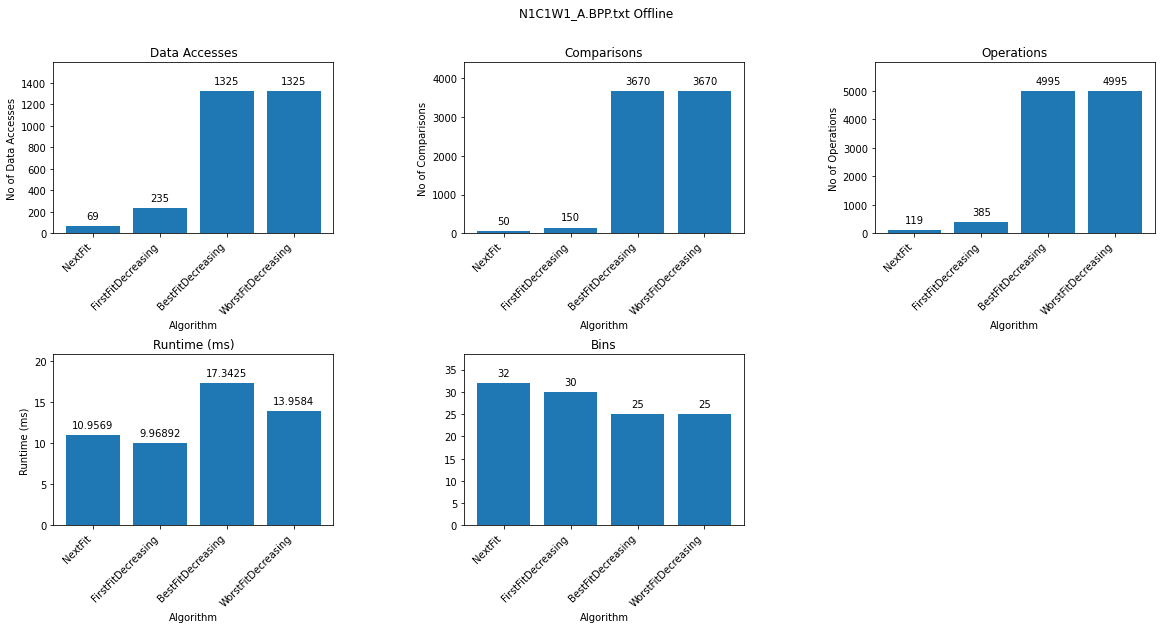

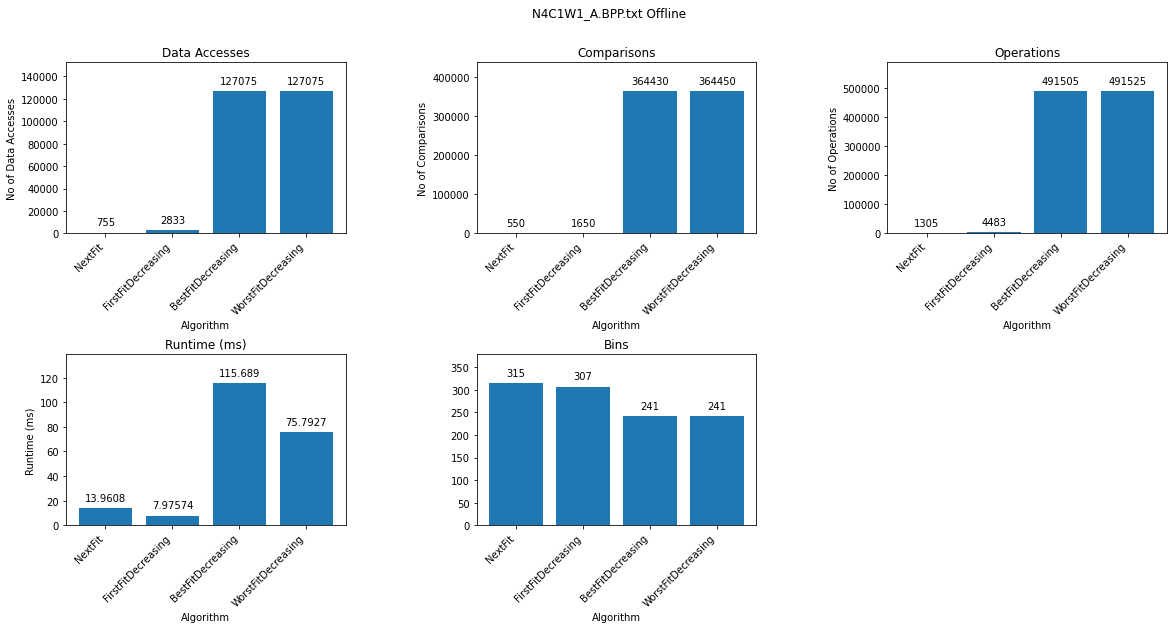

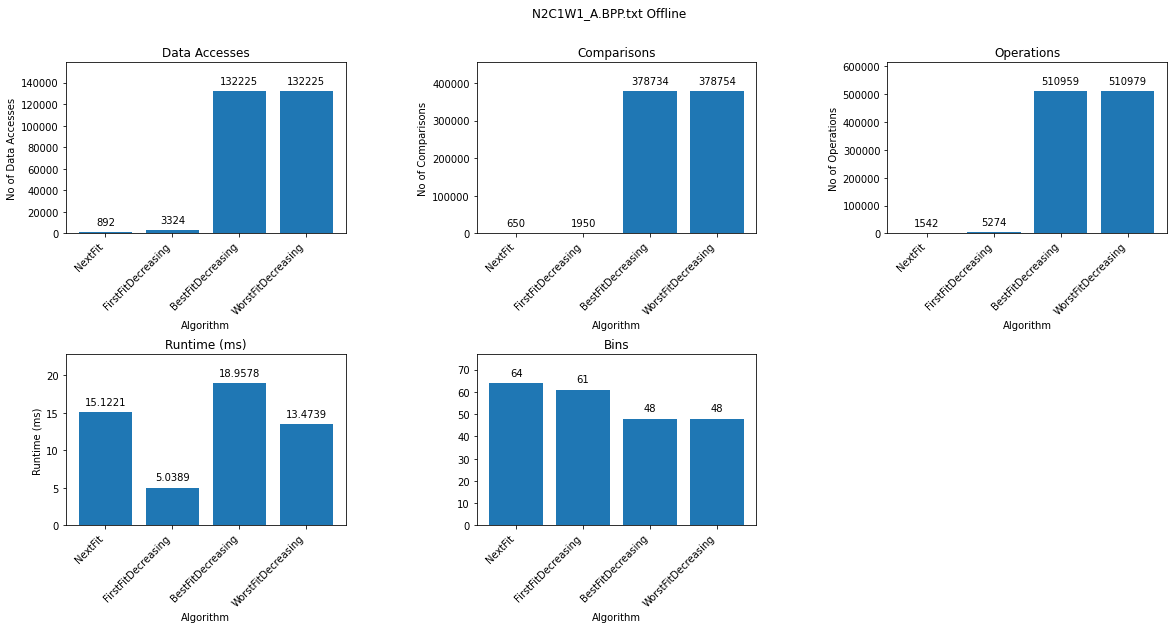

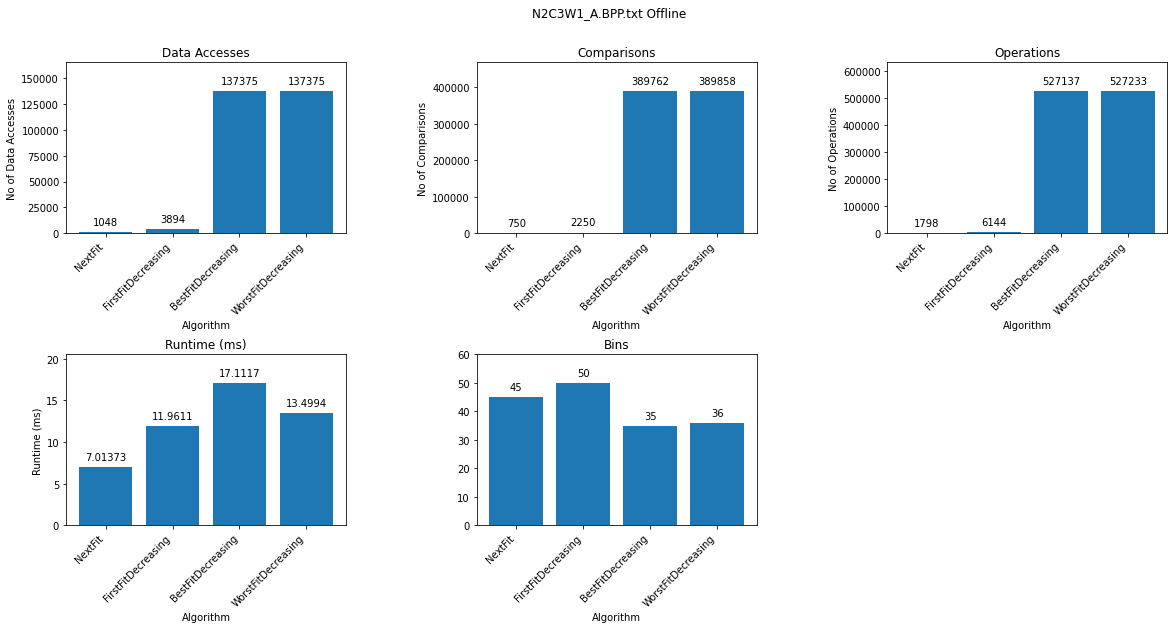

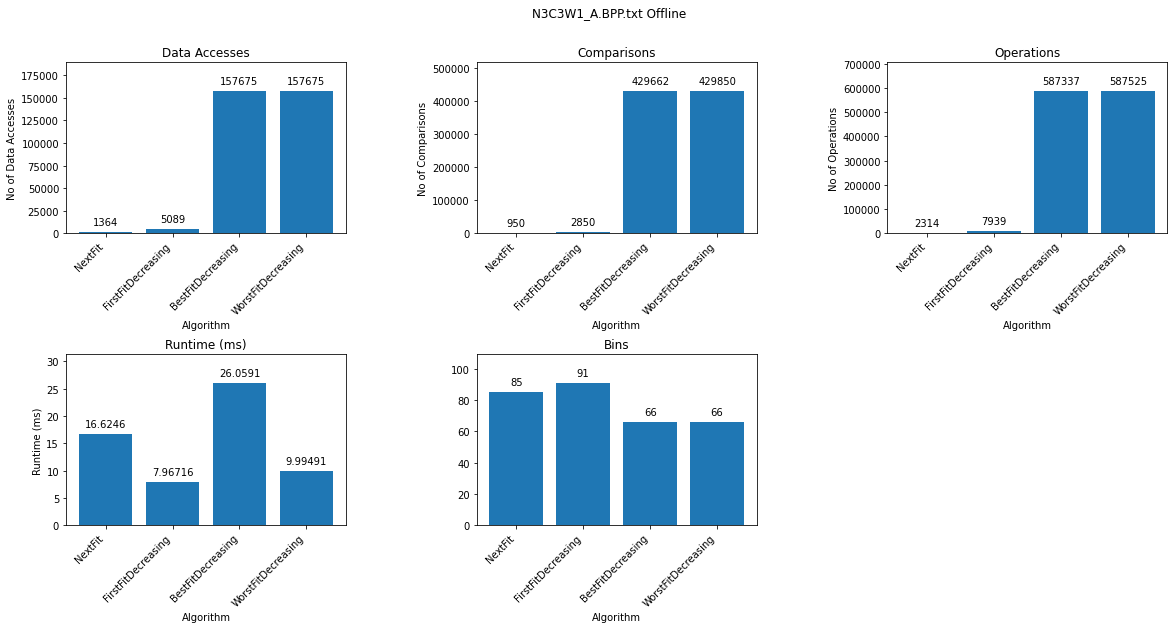

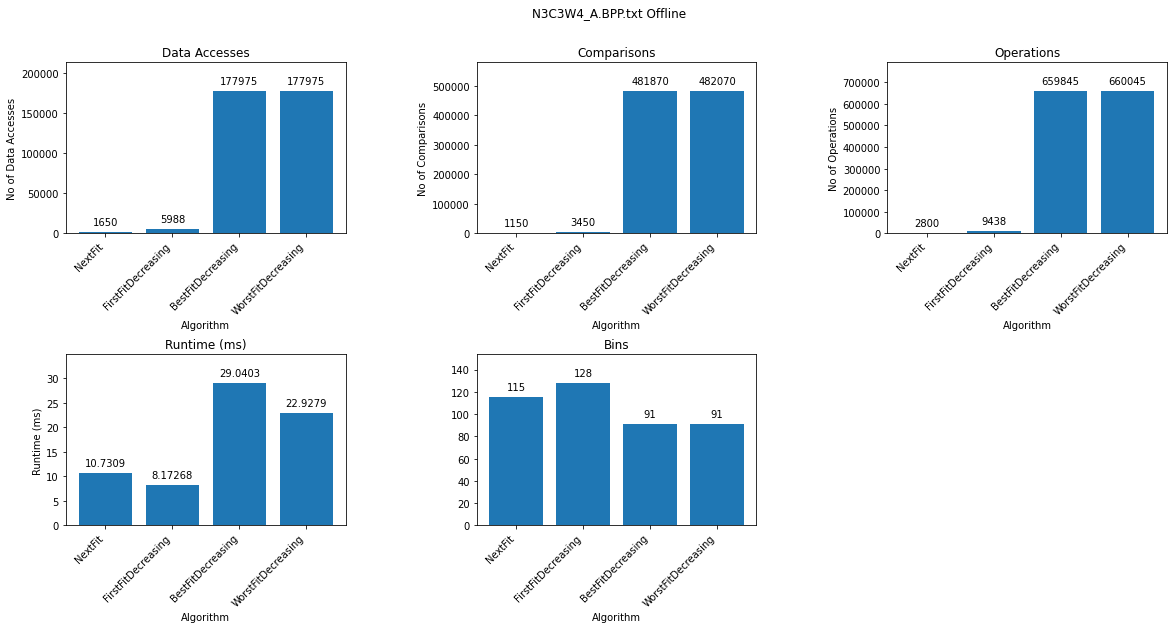

In [4]:
# Comparing KPIs for Offline benchmark cases
compare_KPI(cases, offline_algorithms, "Offline")

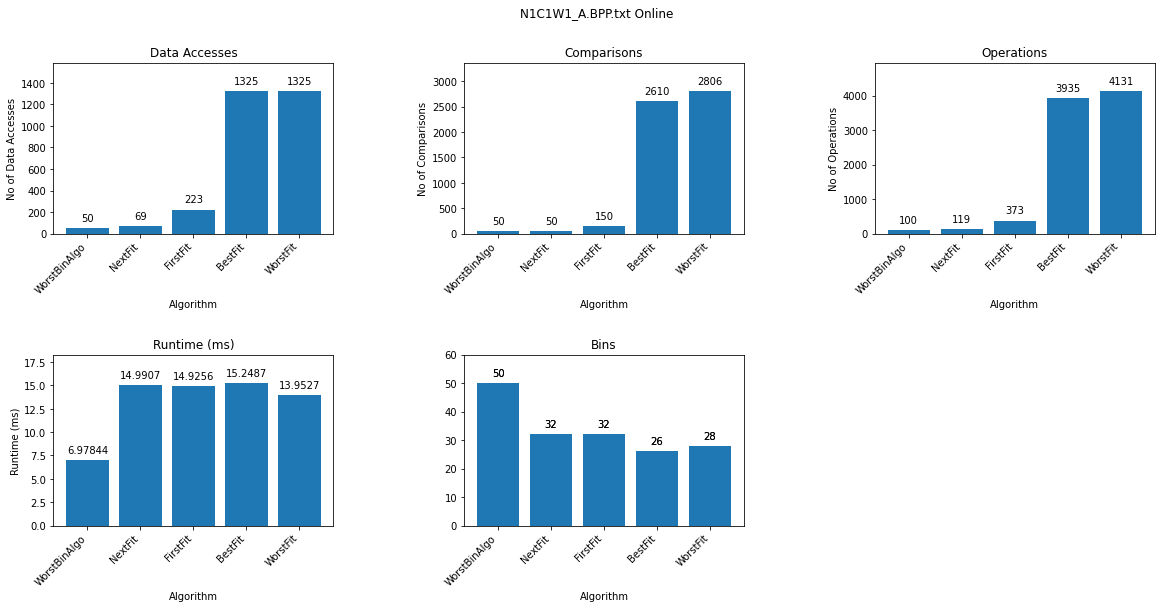

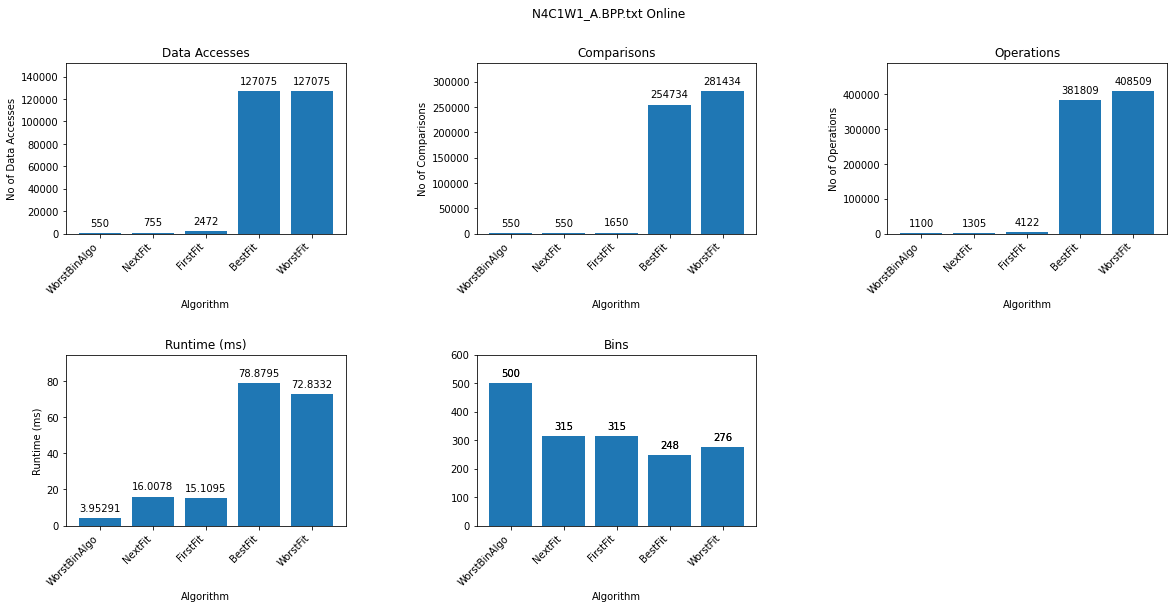

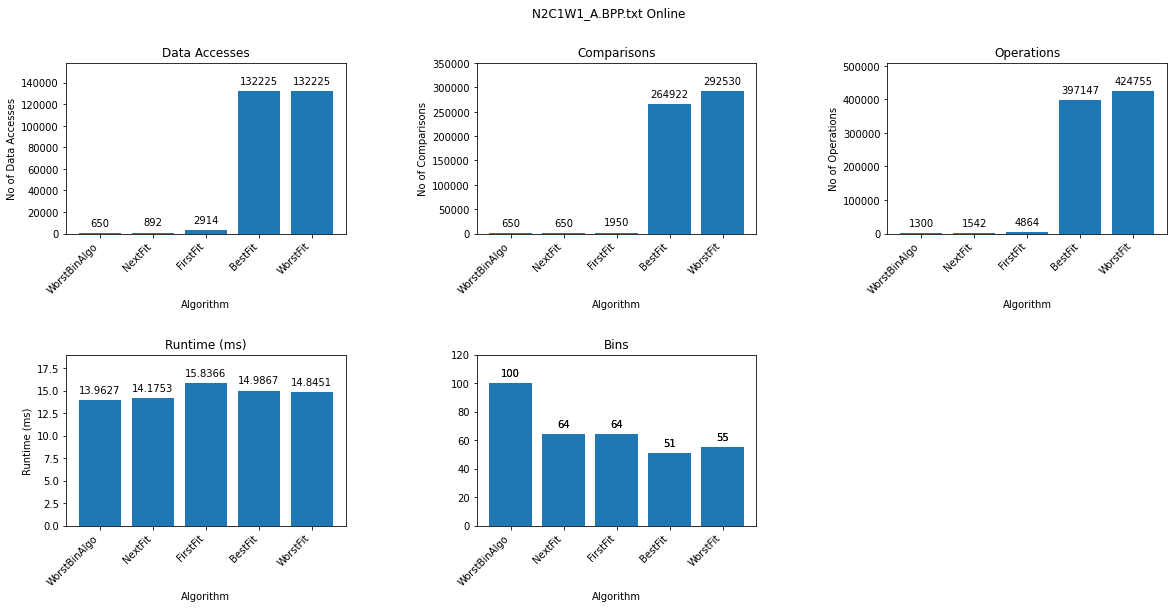

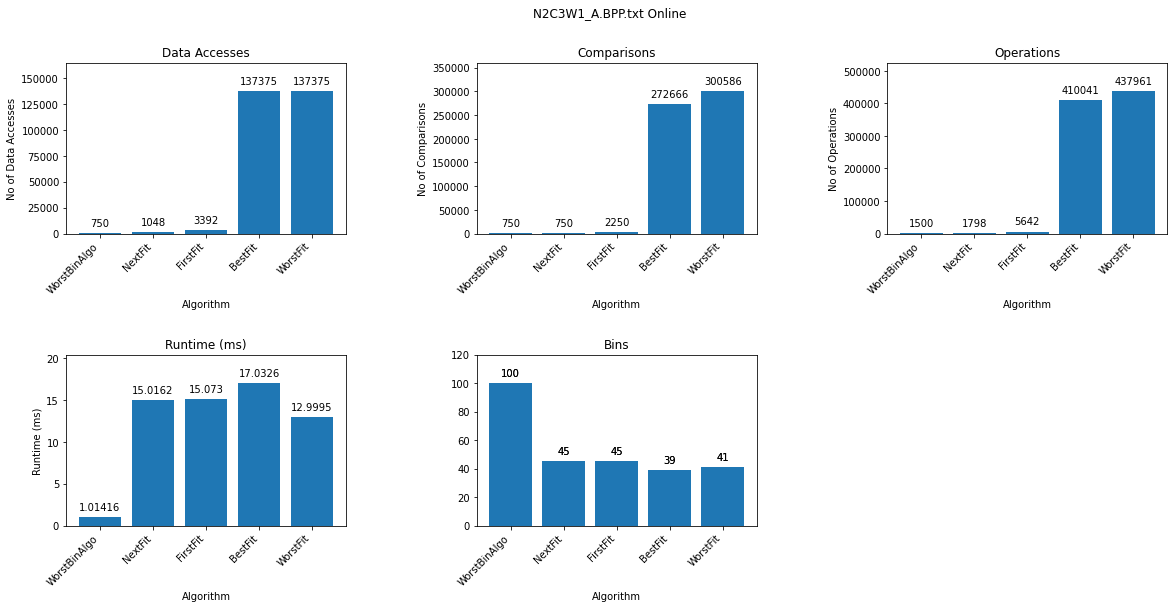

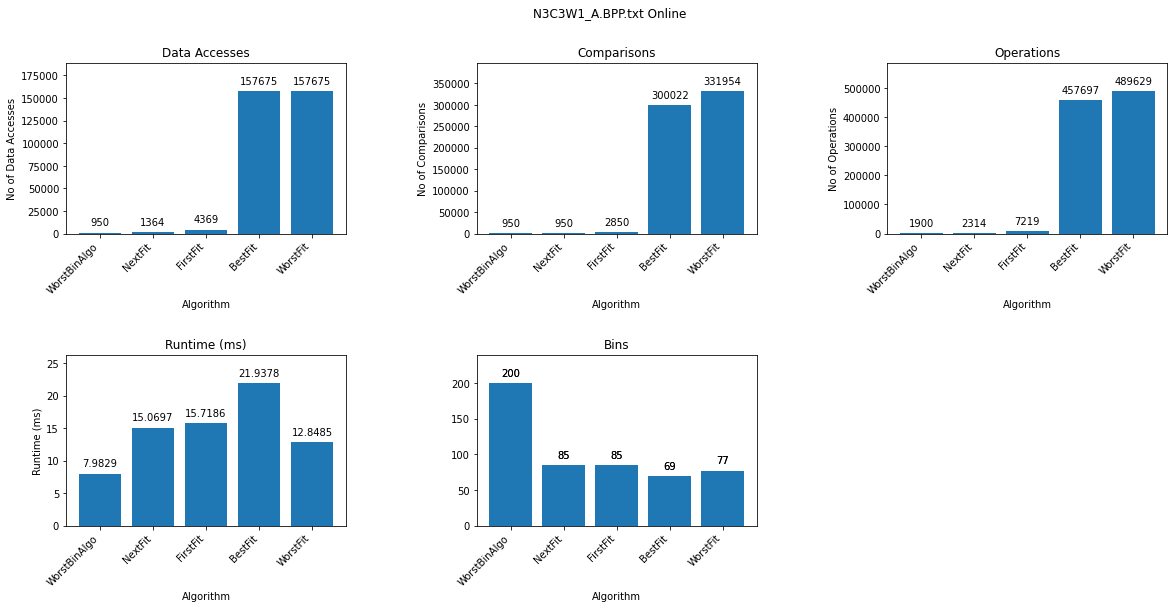

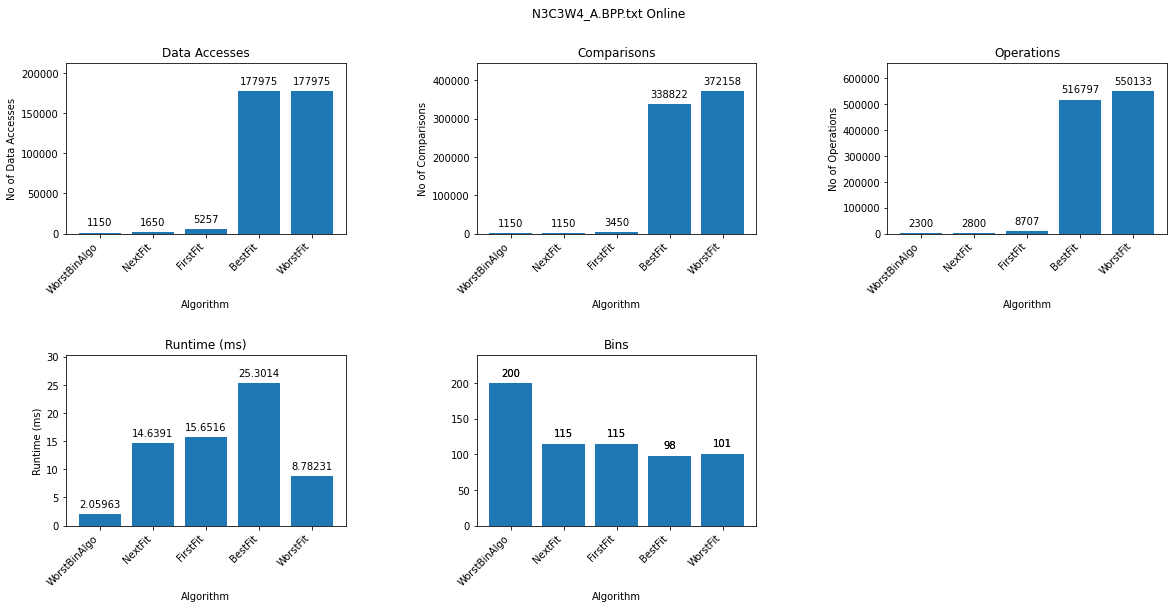

In [5]:
# Comparing KPIs for Online benchmark cases
compare_KPI(cases, online_algorithms, "Online")

### Algorithm Analysis

Worst Bin Algorithm
- While the worst bin algorithm is extremely fast and uses the least number of operations, it unfortunately uses the most amount of bins across every test case. There is a tradeoff between the number of comparisons and the optimality of the algorithm.

Next Fit
- The Next Fit algorithm has less operations used and less runtime compared to the other Algorithms, however utilizes the most bins. This is because of the simplicity of the algorithm - we do little optimization to minimize how many bins are used.

First Fit
- The First Fit algorithm has more operations than Next Fit, however less than Best and Worst Fit. In addition, it is slower than Next Fit, but faster than Best and Worst Fit. This is because of the level of optimization done - it only considered the first bin which could fit the next box regardless of the size. It uses the same number of bins as Best and Worst Fit

Best/Worst Fit
- The difference between the Best and Worst Fit algorithms is a simple change in operator - from < to >. It has the most amount of optimization, hence higher operations, which leads to a longer runtime. It uses the same number of bins as First Fit.

Note that offline algorithms simply call online algorithms, and will be slightly slower while more optimal. The extra runtime is due to the sorting of the weights which is done to optimize the number of bins used.


## T3

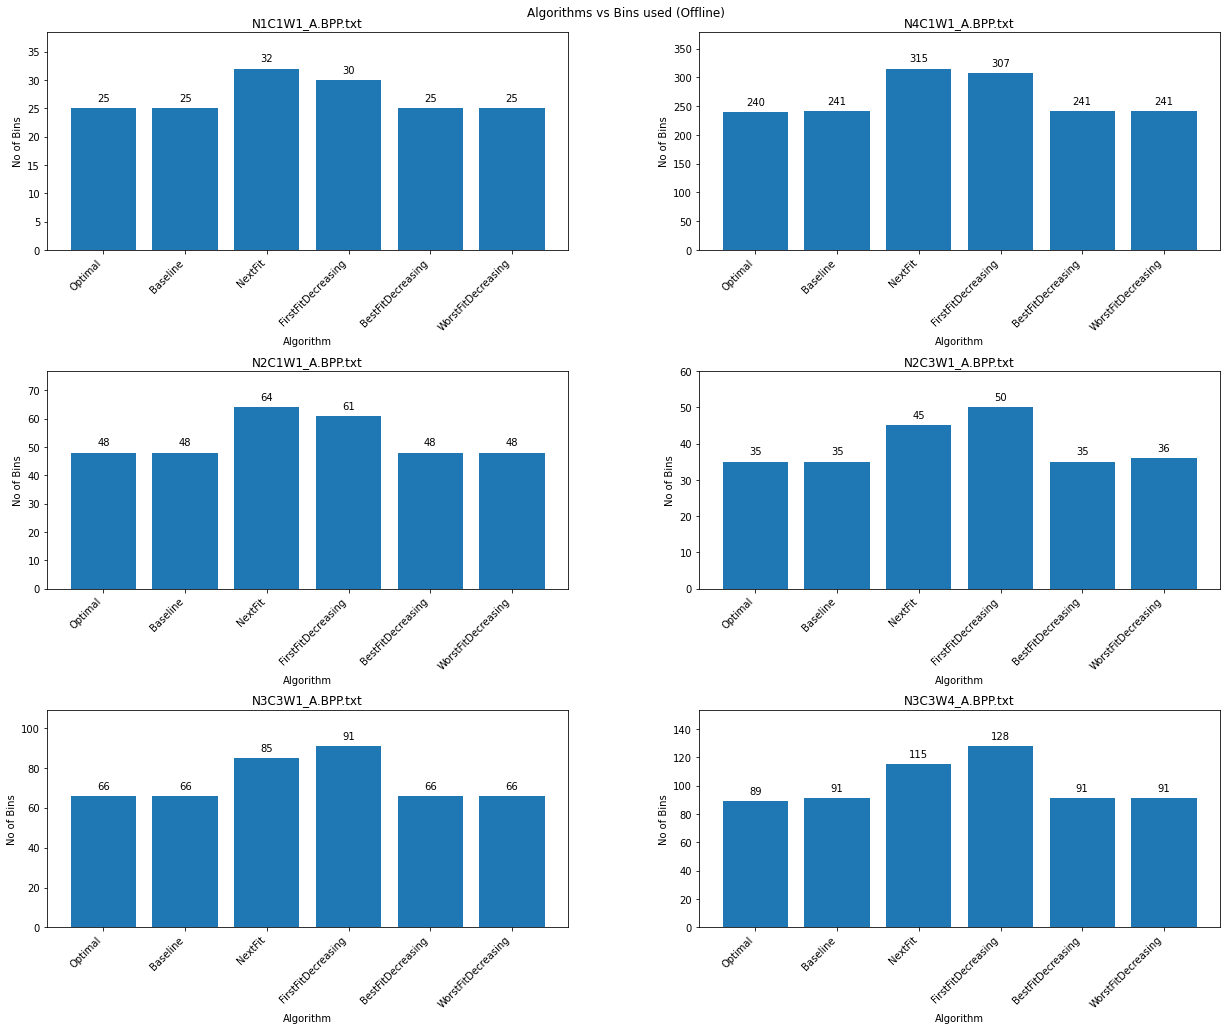

In [6]:
# Compare offline algorithms agaisnt baseline
compare_baseline(cases, offline_algorithms, "Offline")

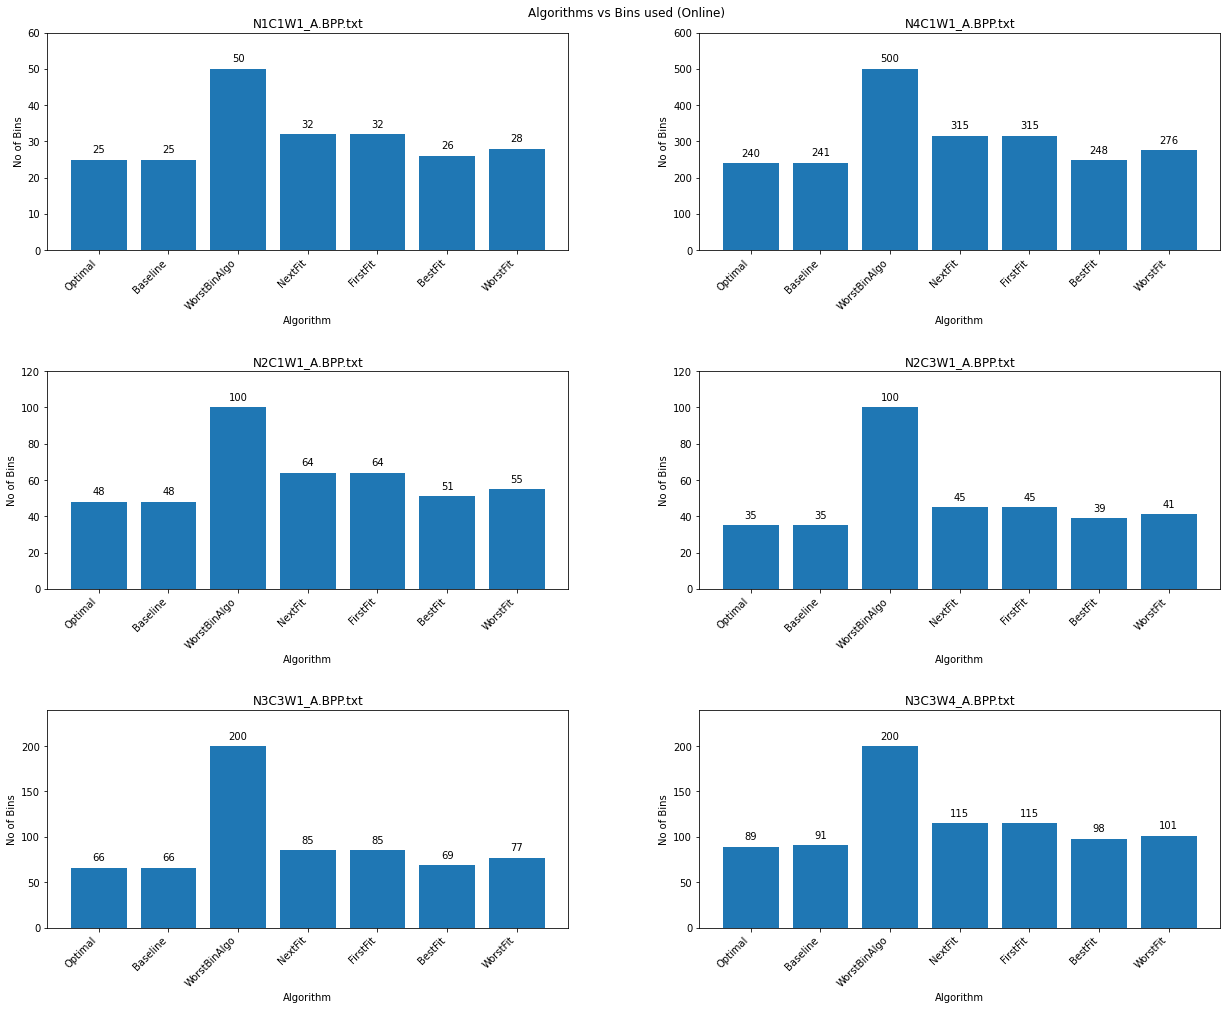

In [7]:
# Compare online algorithms agaisnt baseline
compare_baseline(cases, online_algorithms, "Online")

## T4

In [8]:
from pyperf import BenchmarkSuite
cases = [
    './_datasets/binpp/N1C1W1/N1C1W1_A.BPP.txt',
    './_datasets/binpp/N4C1W1/N4C1W1_A.BPP.txt',
    './_datasets/binpp/N2C1W1/N2C1W1_A.BPP.txt',
    './_datasets/binpp/N2C3W1/N2C3W1_A.BPP.txt',
    './_datasets/binpp/N3C3W1/N3C3W1_A.BPP.txt',
    './_datasets/binpp/N3C3W4/N3C3W4_A.BPP.txt',
    ]

online_algorithms = [
        NextFit(), 
        FirstFit(), 
        BestFit(), 
        WorstFit(),
        RefinedFirstFit()
    ]

# Checking out benchmark runtime result
def process_bench(algo_type):

    b_suite = BenchmarkSuite.load(algo_type)
    names = b_suite.get_benchmark_names()
    test_cases = [[], [], [], [], [], []]

    for i, name in enumerate(names):
        test_cases[i%6].append(name)

    for case in test_cases:
        file = case[0].split(" ")[0]
        print(file + ":")
        for sub_case in case:
            print(sub_case.split(" ")[1] + ": " + str(b_suite.get_benchmark(sub_case).mean()) + " s")
        print()
process_bench("refined_online_bench.json")

N1C1W1_A.BPP.txt:
WorstBinAlgo: 5.034912109384374e-07 s
NextFit: 3.481105200523841e-07 s
FirstFit: 3.565737311102731e-07 s
BestFit: 3.566528542868023e-07 s
WorstFit: 3.5415911039578715e-07 s
RefinedFirstFit: 5.023305638451881e-07 s

N4C1W1_A.BPP.txt:
WorstBinAlgo: 5.124526786877877e-07 s
NextFit: 3.571737543802319e-07 s
FirstFit: 3.56790971752415e-07 s
BestFit: 3.5572783787888674e-07 s
WorstFit: 3.5359488486467565e-07 s
RefinedFirstFit: 5.019939358937482e-07 s

N2C1W1_A.BPP.txt:
WorstBinAlgo: 5.065567588835585e-07 s
NextFit: 3.4670073190690156e-07 s
FirstFit: 3.5951668422110987e-07 s
BestFit: 3.5638339359785517e-07 s
WorstFit: 3.517025693363281e-07 s
RefinedFirstFit: 5.029835955331722e-07 s

N2C3W1_A.BPP.txt:
WorstBinAlgo: 5.081844965763397e-07 s
NextFit: 3.4769997278213024e-07 s
FirstFit: 3.5806520780057304e-07 s
BestFit: 3.59634631467524e-07 s
WorstFit: 3.5278439522445915e-07 s
RefinedFirstFit: 5.048262150938084e-07 s

N3C3W1_A.BPP.txt:
WorstBinAlgo: 5.14232940666363e-07 s
NextFit: 3

### Dataset Selection
The following files have been selected for analysis:
```py
cases = [
    './_datasets/binpp/N1C1W1/N1C1W1_A.BPP.txt',
    './_datasets/binpp/N4C1W1/N4C1W1_A.BPP.txt',
    './_datasets/binpp/N2C1W1/N2C1W1_A.BPP.txt',
    './_datasets/binpp/N2C3W1/N2C3W1_A.BPP.txt',
    './_datasets/binpp/N3C3W1/N3C3W1_A.BPP.txt',
    './_datasets/binpp/N3C3W4/N3C3W4_A.BPP.txt',
    ]

```
This is to capture a wide range of variability amongst data sets, including the number of weights (N), the bin capacity (C), and how how large each weight is compared to the capacity (W). We measured each end of each variable, ranging from N 1-4, C 1-3, and W 1-4. 

### Offline Algorithm Analysis
As expected, NextFit algorithm produces the most number of bins, due to it's naive implementation. the baseline, First/Best/Worst Fit Decreasing algorithms all perform relatively the same, however Best Fit Decreasing and the Baseline algorithm performs the best under all cases.

Interestingly enough, the baseline implementation is very similar to the best fit algorithm, putting weights into bins which it fits the best (minimum space remaining), which explains why the best fit algorithm uses similar amount of bins as the baseline implementation.

### Online Algorithm Analysis
Similar to the offline algorithms, the Best Fit and Baseline algorithm performs best under all test cases. However, due to the unsorted input, there is a wider variability amongst all the algorithms due to the nature of each application, with no algorithm providing the optimal solution.

The baseline algorithm does "cheat" a little bit, as in the description of the algorithm it sorts the total bins before performing the algorithm, which removes the difference between online and offline algorithm.



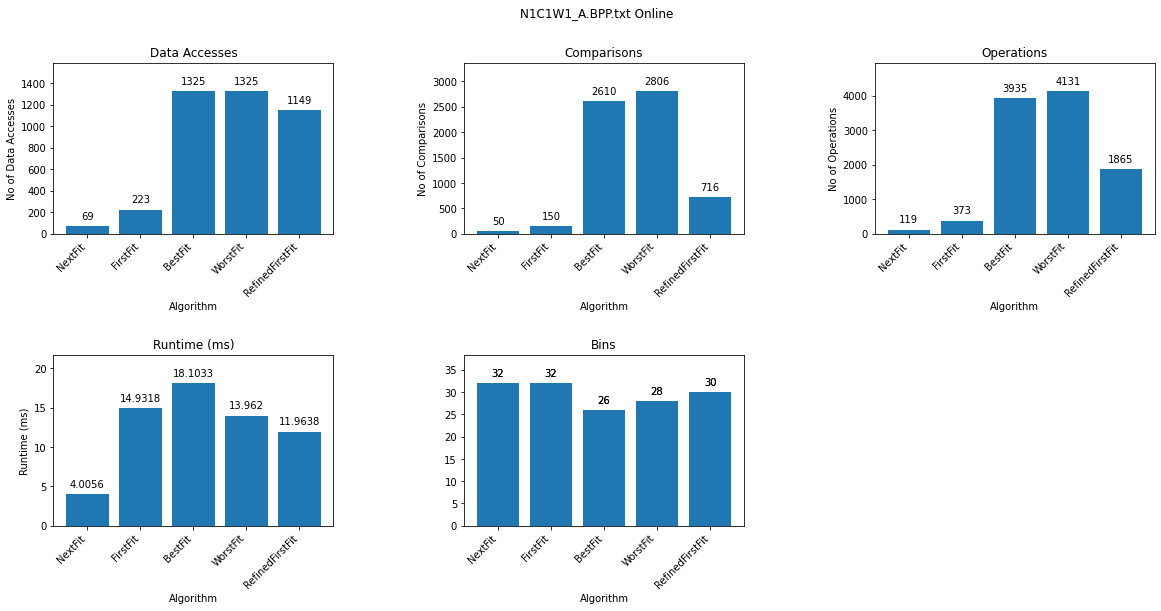

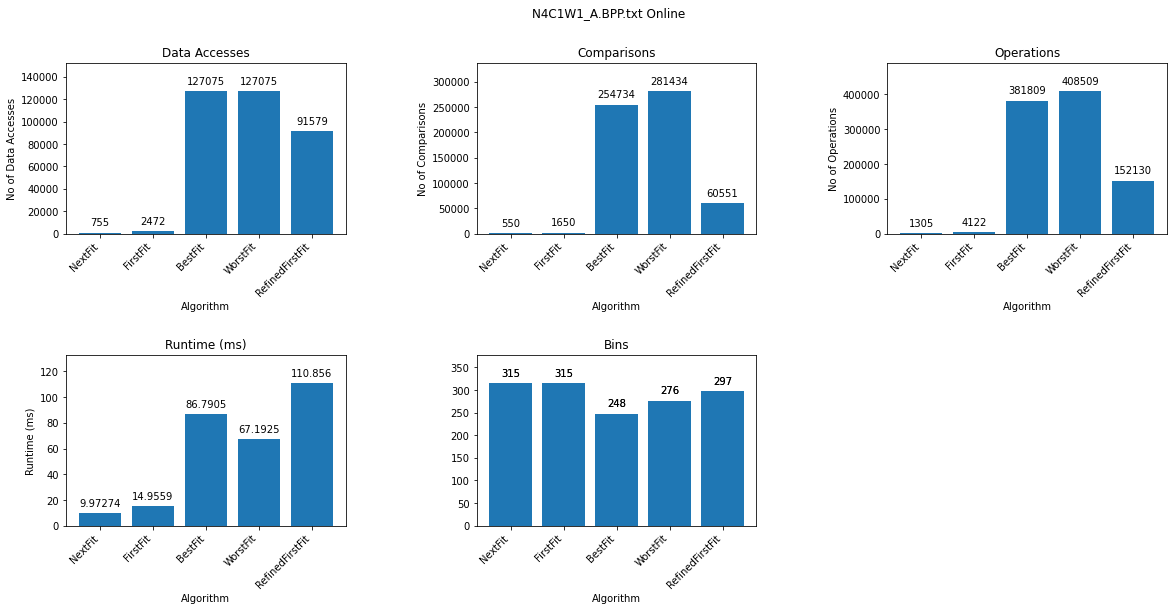

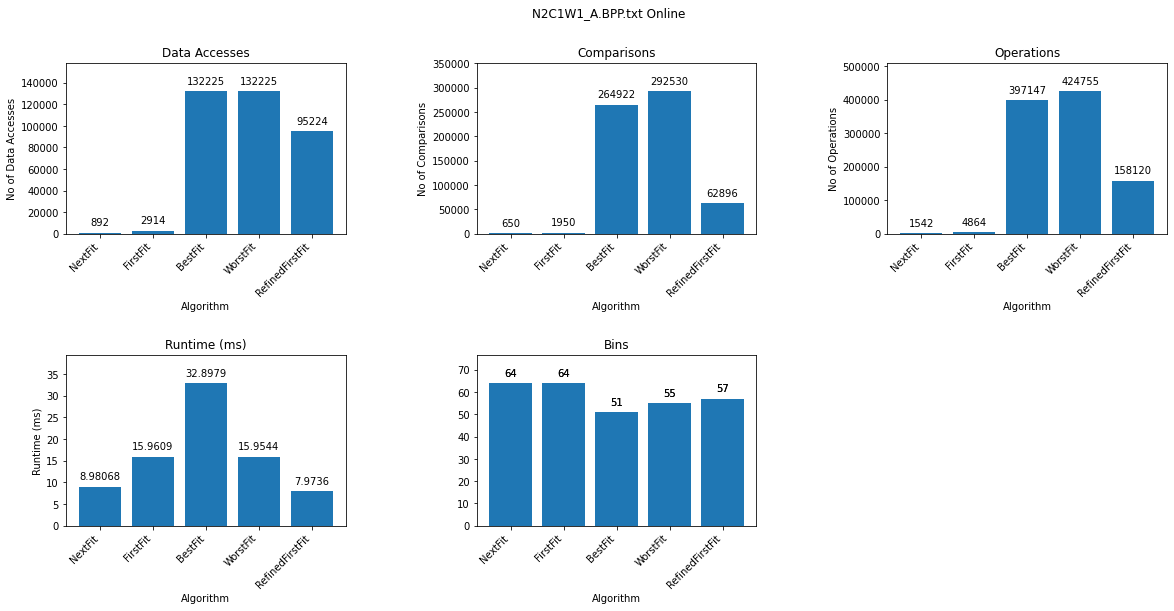

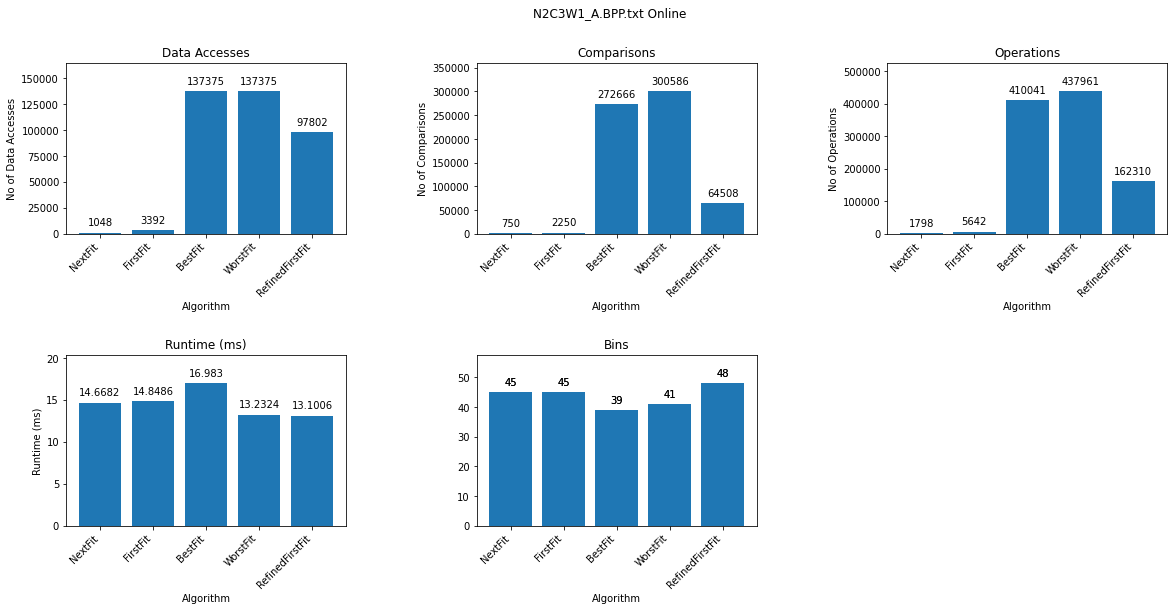

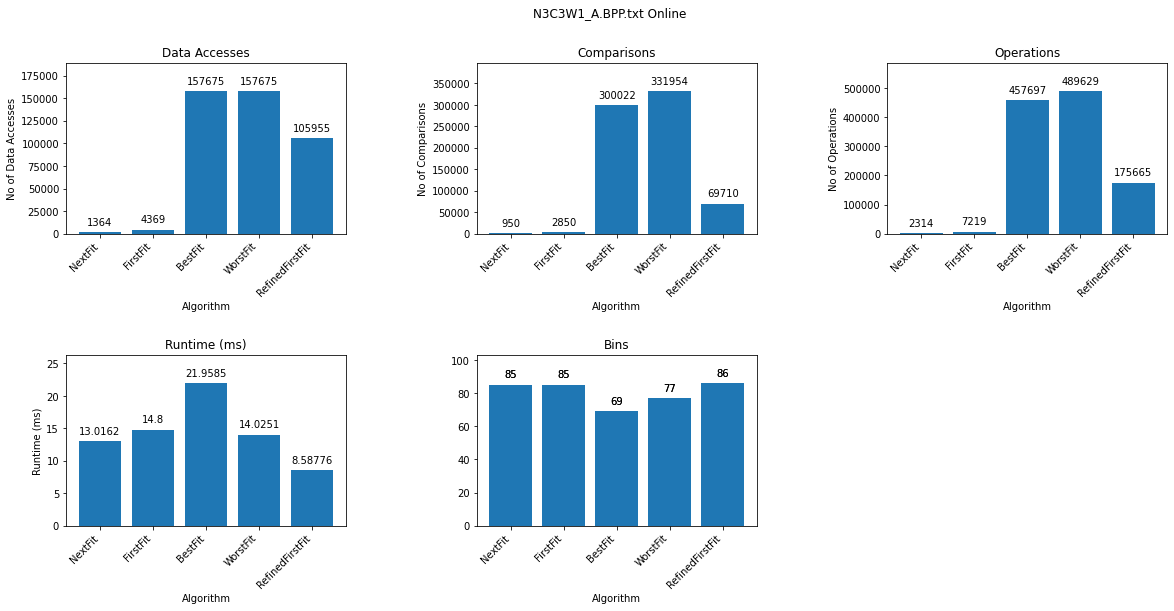

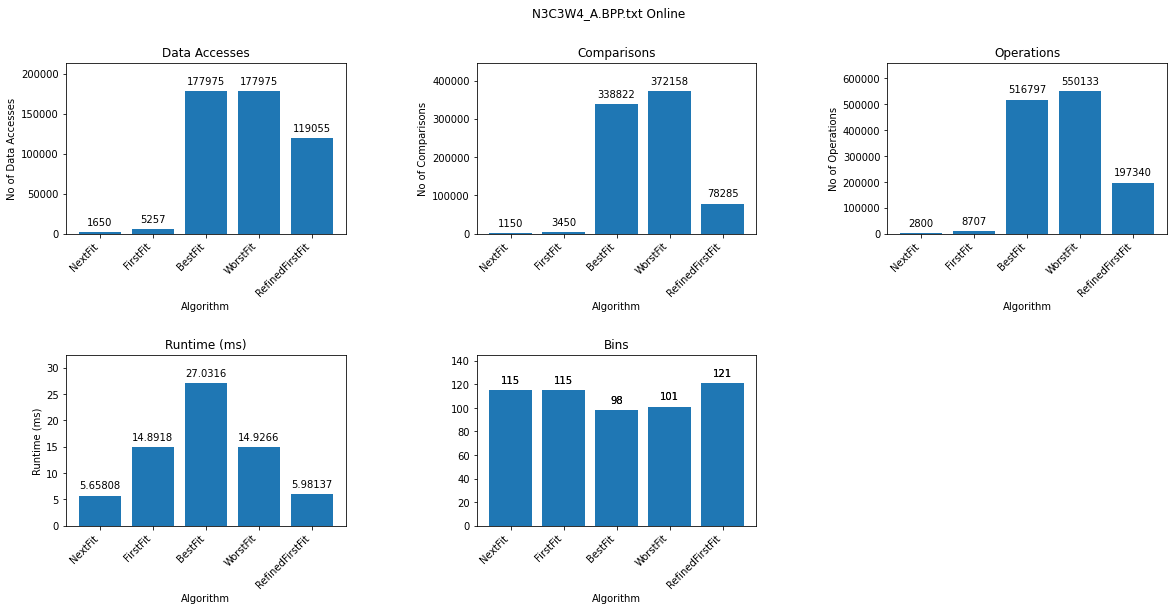

In [9]:
# Comparing KPIs for Online benchmark cases + RefinedFirstFit
compare_KPI(cases, online_algorithms, "Online")

### T4 Analysis

The best way to analyze the RefinedFirstFit algorithm would be to make a comparison between the KPI benchmarking results from the Refined version and the regular First Fit algorithm itself. The RFF algorithm is essentially a modification of the First Fit algorithm where it includes several extra conditions. The goal of RFF is to separate the weights into 4 different classes, where the classes are determined by a range(i.e (1/2,1],(2/5,1/2],(1/3,2/5], etc...). 

In order to determine which weight belongs to which class, we must access the weight information and make comparisons. Thus, it is logical to have way more comparisons and accesses in the RFF algorithm as compared to the FF algorithm. If you look at the 6 images above, you can see that for every test case, we have more accesses and comparisons for every set of RFF data when compared to FF data. This information also applies to the 'operations' category as operations is just the sum between the comparisons and accesses. 

Next, as we know that the RFF algorithm is essentially the application of First Fit but with several extra check conditions, we can infer that the RFF algorithm has a longer run time when compared to FF. This statement holds true as we can see the two data sets provided in the images above supports this claim.


## T5


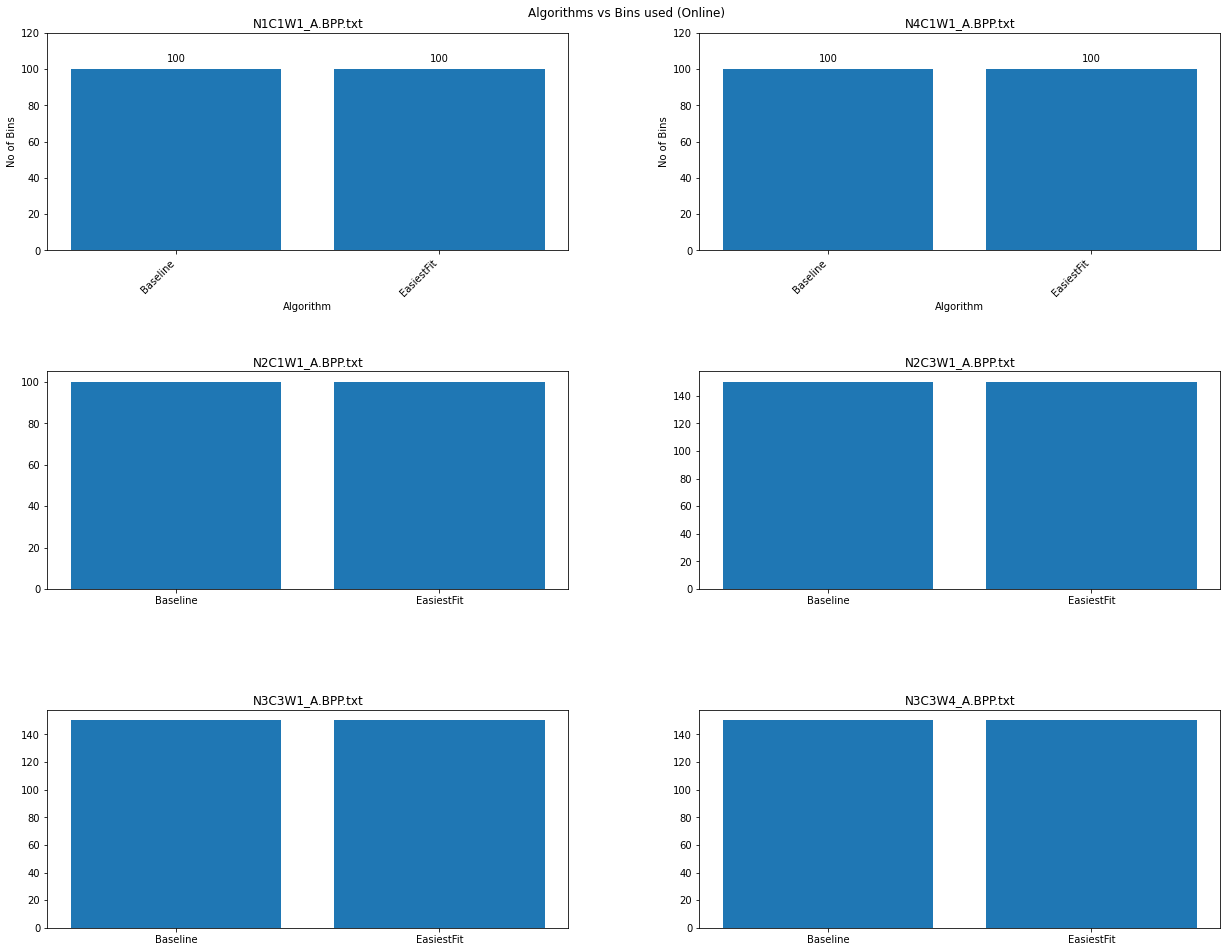

In [15]:
# Compare new baseline and EasiestFit Algorithm
online_algorithms = [EasiestFit()]
compare_baseline_2(cases, online_algorithms, "Online")

Throughout this project, We have used KPI's such as number of comparisons, number of accesses, total number of operations, runtime, and number of bins. To evaluate such new objective for a solution, the current KPI's we have should be relatively fine. 

However, we believe that it is pointless to use number of bins as a KPI for this variant problem as we are already given a predefined set number of bins to use. 
Instead of using the number of bins KPI, we think it is best to use the average capacity of each bin instead. By measuring the average capacity of each bin, we would want to make the most use out of each bin and obtain a relatively evenly distributed weight between each of the bins.

## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

### Quinn Self Reflection

#### Backward
To product these results, there was plenty of learning needed to be done in order to learn the system architecture, develop the various bin packing algorithms, and generate subplots for the required algorithms. We took an iterative approach, working through various branches for each responsability to minimize merge conflicts - allowing us to concurrently work through the project.

#### Inward
For this piece of work, I wanted to produce clean, readable code which followed SOLID principles. I met these standards from the quality of code from the algorithms to the benchmarking and KPIs. It definitely helped to utilize flake8 to ensure a quality standard of code, even if it made the code less readable at time.

However I felt as the results from the benchmarks do not tell the entire story of how each algorithm performs, there simply is not enough time or space to analyze the nitty gritty on the KPIs of each algorithm. Should I had more time, I would have analuzed the performance of every algorithm on every test case, and leverage the data from my findings to produce a well-founded argument over the "best" algorithm given a various situation.

#### Outward
One thing I'm proud of is how I utilized subplots to aid my argument in comparing algorithms, it was difficult to find the documentation required to display the information that I wanted. In addition, I'm proud of how I displayed my data; utilizing a line graph to present the information however it would not make sense given the dataset, as the x-axis would have to represent an increase in weights, which is not linear in the test cases.

#### Forward
The biggest lesson I will take away from the lab is to always question the nature of various implementations. For example, digging deeper into how the baseline algorithm works highlighted some key insights when discussing comparisons agaisnt other algorithms.

In addition, I learned that there is never a "correct" solution. Various solutions exist around various cases, for example Best Fit may be the best overal implementation, however a First Fit algorithm may be appropariate if we know that the order of bins is large, small, large, small, etc. It's important to evaluate various solutions agaisnt the problem constraints that are determined - and there is never "one" right answer, but many roads which lead to Rome.

### Fondson Self-Reflection

#### Backward

Throughout this lab project, I have learned several new information related to working in a team environment. This was my first time using the application of branches within git, and I feel like it is a great way to keep everything organized and conflict-free when combining our work together. I feel like this information was super useful to learn. Moreover, I had to go through the process of reading PDFs and wiki-pages in order to grasp a good understanding of the problem at hand, for me to further implement the required algorithms desired in this project. 

#### Inward

When starting this project, I had decently high standards as I do with all of my work. The most important factor towards high quality work is putting the time and effort into what needs to be completed. I feel that throughout this project, I have demonstrated that effort and sucessfully met these standards that I set for myself. I had a lot of struggle throughout T4 and grasping the understanding of the problem at hand. I had to go through MS Teams and read the FAQ's as to what needs to be completed, which then further led me to a PDF that the professor shared. This PDF was super useful as it gave a better explanation as to what needs to be done related to T4 and the implementation of the RefinedFirstFit algorithm. Overall, my point that I wanted to make was that the effort was most definitely put out there, which is why I'm satisfied with the production of our work. 


#### Outward

One thing that I particularly want everyone to look at related to this project, would be the implementations of the online algorithms, refined first fit algorithm, and the KPI + benchmarking graphs. By far, the most complicated part of this project was the production of the benchmarking graphs and the use of pyperf. I am super proud of my partner and I, as we were able to figure out the problem at hand and produce the requirements defined in the lab. 

#### Forward

Moving forward, I will retain the knowledge related to working in branches, the use of pyperf, benchmarking, and overall the application of the SOLID principles when working on this project. Moreover, the concepts and knowledge of new algorithms is always a good thing to remember as well. It does not hurt to remember more algorithms as it may show up in my future practices. Overall, I have learned several new tools and information after completing this lab, and I am super satisfied with that work we have completed. 
